In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

splits = {'train': 'train.csv', 'test': 'test.csv'}
df = pd.read_csv("hf://datasets/winvoker/turkish-sentiment-analysis-dataset/" + splits["train"])

In [4]:
df.head()

,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir .,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari


In [5]:
df.drop(columns=["dataset"], inplace=True)

In [6]:
df.head()

,text,label
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive
3,Çünkü aranan tapınak bu bölgededir .,Notr
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440679 entries, 0 to 440678
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    440679 non-null  object
 1   label   440679 non-null  object
dtypes: object(2)
memory usage: 6.7+ MB


In [8]:
df.isnull().sum()

,0
text,0
label,0


In [9]:
df['label'].value_counts()

,count
label,
Positive,235949
Notr,153825
Negative,50905


In [11]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
import preprocess_kgptalkie as ps
df.columns

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-cja4spe9
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-cja4spe9
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit e5b1f0710cb1ea5ebbc73d30abe8d45a07cbb399
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7618 sha256=aae607997f4bcb57affb7b094a9deb968d83433763bb6947101e56d46ffc0272
  Stored in directory: /tmp/pip-ephem-wheel-cache-yc_m_0rv/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess_kgptalkie


Index(['text', 'label'], dtype='object')

In [12]:
df = ps.get_basic_features(df)

In [13]:
df.columns

Index(['text', 'label', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

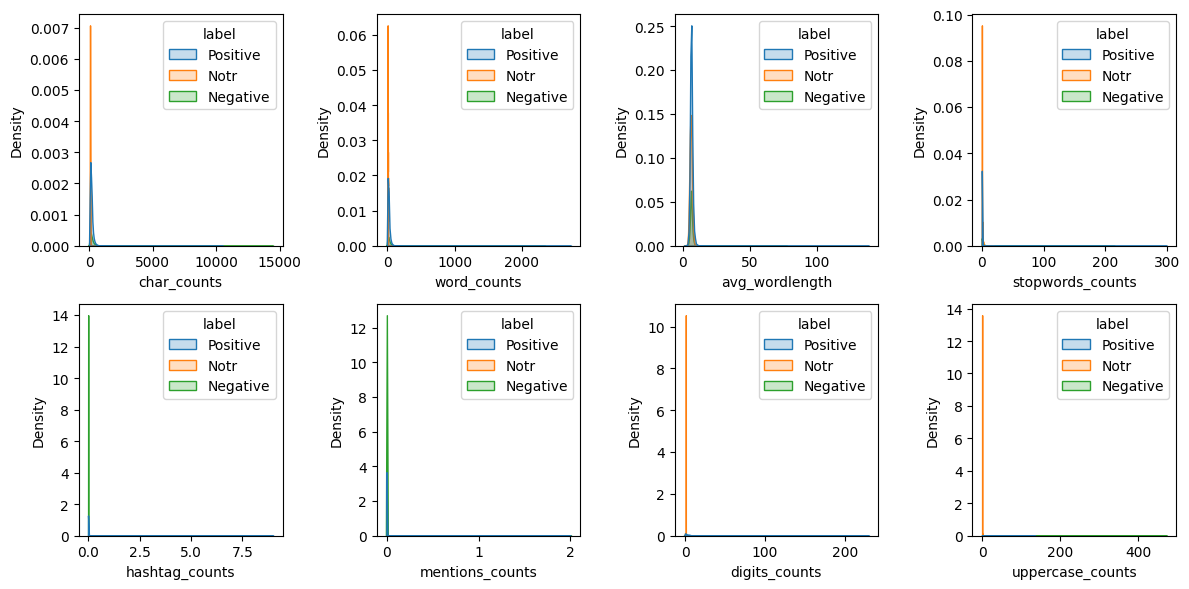

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="label", fill=True)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

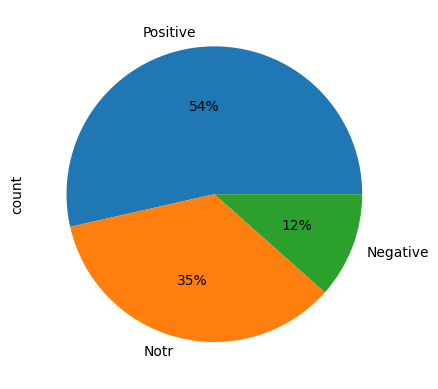

In [15]:
df['label'].value_counts().plot(kind="pie", autopct="%1.0f%%")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


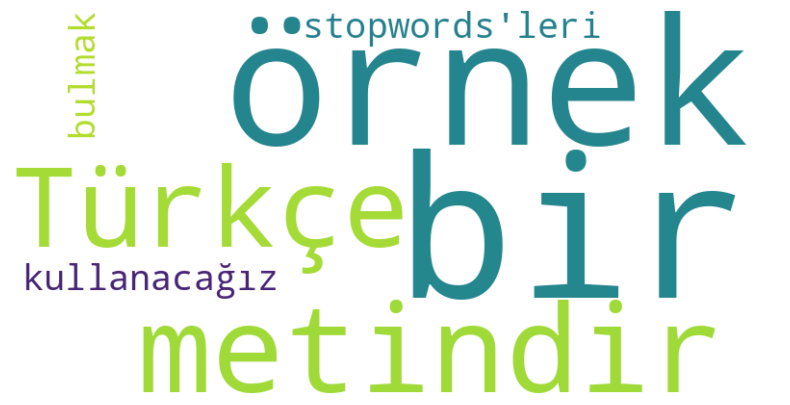

In [17]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

nltk.download('stopwords')
turkish_stopwords = set(stopwords.words('turkish'))

text = "Bu bir örnek metindir. Türkçe stopwords'leri bulmak için kullanacağız."

# WordCloud nesnesi oluşturma
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=turkish_stopwords).generate(text)

# WordCloud'u gösterme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(stopwords.words('turkish'))
print(stopwords)

{'biz', 'kim', 'mu', 'daha', 'ile', 'kez', 'mü', 'hep', 'ki', 've', 'veya', 'mı', 'az', 'her', 'de', 'için', 'ise', 'birkaç', 'gibi', 'da', 'çünkü', 'şey', 'çok', 'ne', 'o', 'sanki', 'hepsi', 'bazı', 'siz', 'en', 'niçin', 'hiç', 'acaba', 'biri', 'neden', 'bu', 'nerede', 'nereye', 'belki', 'tüm', 'birşey', 'nasıl', 'nerde', 'defa', 'niye', 'diye', 'aslında', 'yani', 'hem', 'ya', 'eğer', 'ama', 'şu'}


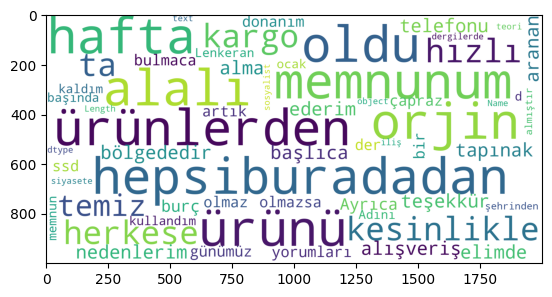

In [19]:
wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df["text"]))

plt.imshow(wordcloud)

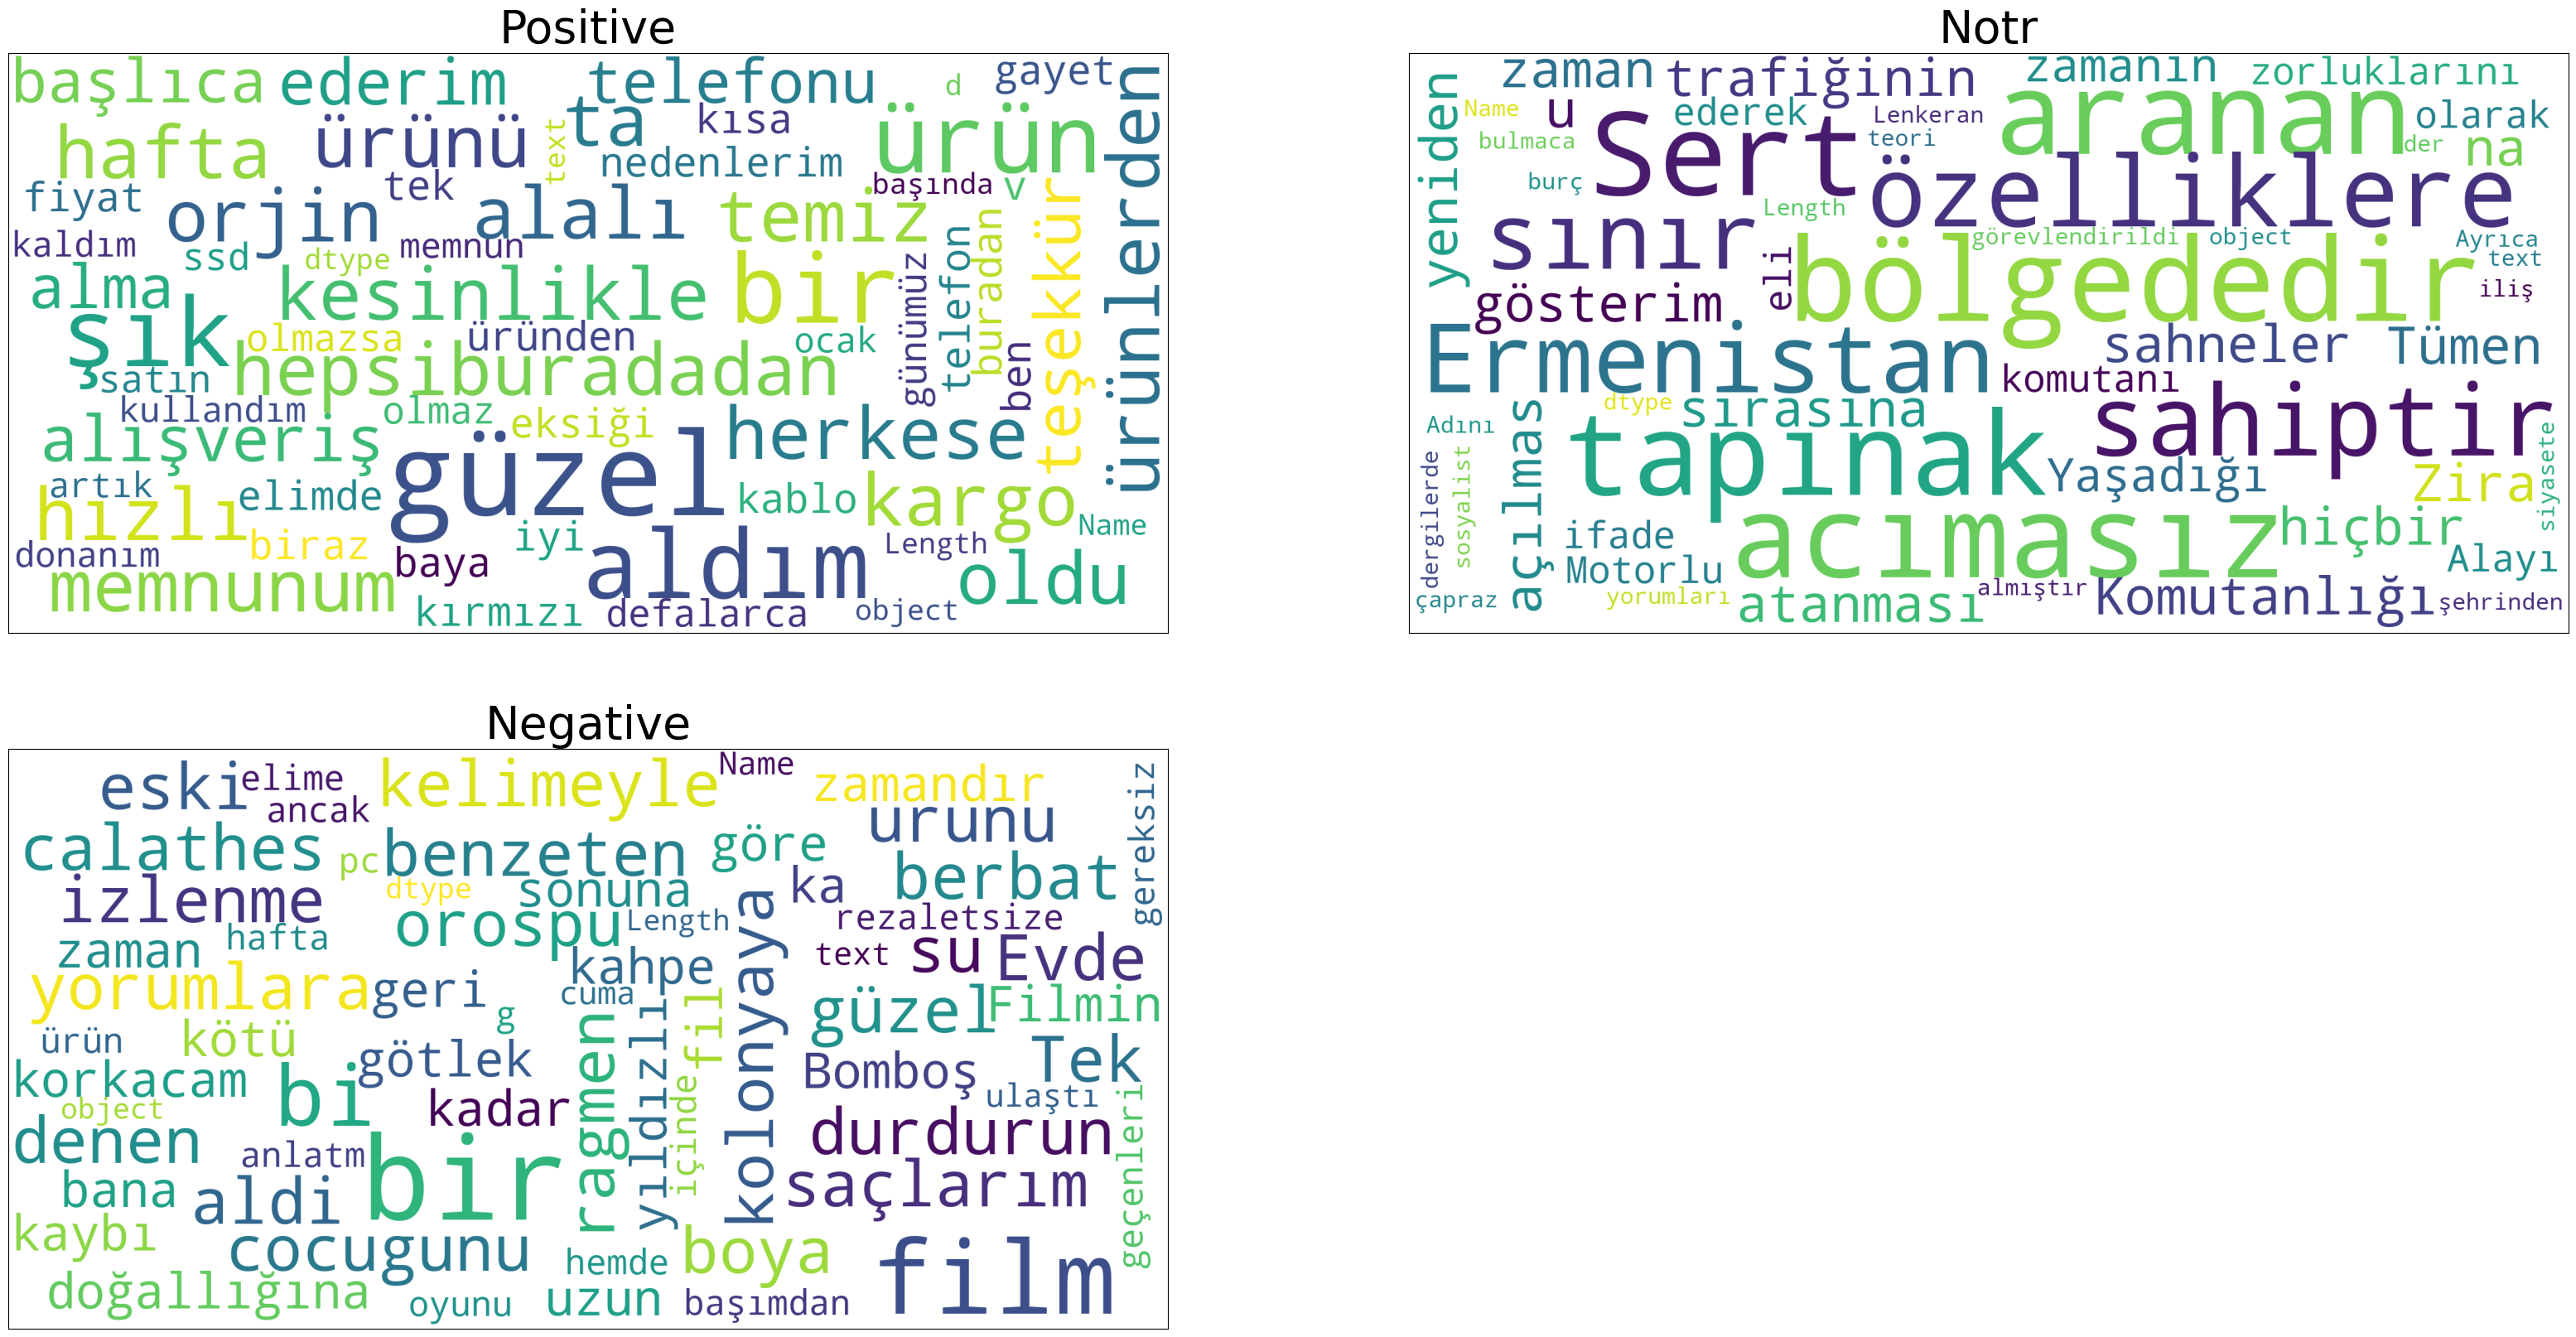

In [20]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df["label"].unique()):
    plt.subplot(2,2, index+1)

    data = df[df["label"]==sent]["text"]
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(data))

    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

In [21]:
df["text"] = df["text"].apply(lambda x: x.lower())
df["text"] = df["text"].apply(lambda x: ps.remove_urls(x))
df["text"] = df["text"].apply(lambda x: ps.remove_html_tags(x))
df["text"] = df["text"].apply(lambda x: ps.remove_rt(x))
df["text"] = df["text"].apply(lambda x: ps.remove_special_chars(x))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape

((352543,), (88136,))

In [24]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfid', TfidfVectorizer(stop_words=list(stopwords))), ('rfc', RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['biz', 'kim', 'mu', 'daha', 'ile',
                                             'kez', 'mü', 'hep', 'ki', 've',
                                             'veya', 'mı', 'az', 'her', 'de',
                                             'için', 'ise', 'birkaç', 'gibi',
                                             'da', 'çünkü', 'şey', 'çok', 'ne',
                                             'o', 'sanki', 'hepsi', 'bazı',
                                             'siz', 'en', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [25]:
print(clf)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['biz', 'kim', 'mu', 'daha', 'ile',
                                             'kez', 'mü', 'hep', 'ki', 've',
                                             'veya', 'mı', 'az', 'her', 'de',
                                             'için', 'ise', 'birkaç', 'gibi',
                                             'da', 'çünkü', 'şey', 'çok', 'ne',
                                             'o', 'sanki', 'hepsi', 'bazı',
                                             'siz', 'en', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])


In [26]:
from sklearn.metrics import classification_report

In [27]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.92      0.45      0.60     10100
        Notr       0.95      0.97      0.96     30657
    Positive       0.88      0.97      0.92     47379

    accuracy                           0.91     88136
   macro avg       0.92      0.80      0.83     88136
weighted avg       0.91      0.91      0.90     88136



In [28]:
clf.predict(["iyi bir ürün"])

array(['Positive'], dtype=object)

In [29]:
import pickle
pickle.dump(clf, open("twitter_sentiment2.pkl", "wb"))